Este colab fue desarrollado por Arnold Charry Armero

# Empresa con Proyectos

Una empresa tiene nueve proyectos en consideración. El
VPN agregado por cada proyecto y el capital requerido por cada
proyecto durante los próximos dos años se da en la Tabla 9. Todos
Las cifras están en millones. Por ejemplo, el Proyecto 1 agregará $\$14$
millones en VPN y requieren gastos de $\$12$ millones
durante el año 1 y $\$3$ millones durante el año 2. Cincuenta millones son
disponible para proyectos durante el año 1 y $\$20$ millones son
disponible durante el año 2. Suponiendo que podamos emprender una
fracción de cada proyecto, ¿cómo podemos maximizar el VPN?

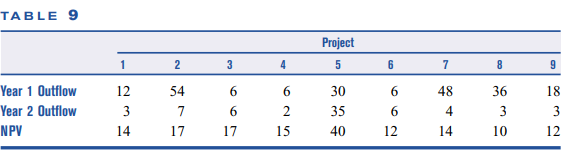

# Conjuntos

$ i = \text{Inversión indexado por } i$

## Parámetros

$ VPN_{i} = \textrm{VPN generado por el proyecto } i $

$ CO_{ij} = \textrm{Salida de caja en el proyecto } i  \textrm{ en el momento } j $

$ F_{j} = \textrm{Presupuesto en el momento } j $

## Variables de decisión

$ x_{i} = \textrm{fracción de inversión comprada }i$

## Función objetivo

$$ \textrm{Max } z = \sum_{i = 1}^{n} VPN_{i}\: x_{i} $$

## Restricciones

No se puede rebasar el presupuesto para las inversiones,

$$ \sum_{i = 1}^{n}x_{i}\: CO_{ij} \leq  F{j}, \forall j$$

Todas las variables son fracciones o completas,

$$ x_{i} \leq 1, \forall i $$

In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 25.5 MB/s eta 0:00:00


In [2]:
#Se importa la libreria
from pulp import *

In [3]:
inversión = range(9)
momento = range(2)

In [4]:
#Parámetros
VPN = [14, 17, 17, 15, 40, 12, 14, 10, 12]

CO = [[12, 54, 6, 6, 30, 6, 48, 36, 18], [3, 7, 6, 2, 35, 6, 4, 3, 3]]

F = [50, 20]

In [5]:
# Crear la instancia del modelo
model = LpProblem(name="Empresa_con_Proyectos", sense=LpMaximize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (inversión), 0, None, LpContinuous)

# Agregar la función objetivo
model += lpSum([X[i] * VPN[i] for i in inversión])

# Agregar las restricciones

for j in momento:
  model += lpSum(CO[j][i] * X[i] for i in inversión) <= F[j]

for i in inversión:
  model += X[i] <= 1

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Utilidades totales = $", value(model.objective))

Status: Optimal
X_0 = 1.0
X_1 = 0.0
X_2 = 1.0
X_3 = 1.0
X_4 = 0.0
X_5 = 0.96969697
X_6 = 0.045454545
X_7 = 0.0
X_8 = 1.0
Utilidades totales = $ 70.27272726999999
